In [1]:
import geopandas as gpd
from pathlib import Path
from keplergl import KeplerGl

from PIL import Image
import matplotlib.pyplot as plt
import h3pandas

In [2]:
data_path = Path('U:/staff-umbrella/imagesummary/data/Delft_NL')

# Load data
boundary = gpd.read_file(data_path / 'boundary/boundary.geojson')
panoids = gpd.read_file(data_path / 'panoids/panoids.geojson')
network = gpd.read_file(data_path / 'network/edges/edges.geojson')
network_nodes = gpd.read_file(data_path / 'network/nodes/nodes.geojson')
cells = gpd.read_file(data_path / 'cells/cells.geojson')
uberhex_7 = gpd.read_file('Geo-JSON Files/neighbourhood_info_v2_0.geojson')
uberhex_8 = gpd.read_file('Geo-JSON Files/neighbourhood_info_v2_1.geojson')
uberhex_9 = gpd.read_file('Geo-JSON Files/neighbourhood_info_v2_2.geojson')
wijken = gpd.read_file('Geo-JSON Files/wijken_en_buurten.geojson')

In [13]:
boundary_gdf = gpd.read_file(data_path / 'boundary/boundary.geojson')
boundary_gdf = gpd.GeoDataFrame(geometry=boundary_gdf.buffer(distance=0.001))


# Set the H3 resolution (adjust as needed)
resolution = 9
# print(boundary_gdf.h3.polyfill_resample(resolution))

g6 = boundary_gdf.h3.polyfill_resample(6)
g7 = boundary_gdf.h3.polyfill_resample(7)
g8 = boundary_gdf.h3.polyfill_resample(8)
g9 = boundary_gdf.h3.polyfill_resample(9)
g10 = boundary_gdf.h3.polyfill_resample(10)

C:\Users\Soulless Creature\AppData\Local\Temp\ipykernel_4216\337254107.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  boundary_gdf = gpd.GeoDataFrame(boundary_gdf.buffer(distance=0.001))


AttributeError: 'Series' object has no attribute 'geometry'

In [4]:
import sys
'geopandas' in sys.modules

True

In [4]:
panoids.describe()

,year,month,lat,lng,ask_lng,ask_lat,consulted,dist,angle
count,35856.000000,35856.000000,35856.000000,35856.000000,35856.000000,35856.000000,35856.0,35856.000000,35856.000000
mean,2015.165718,7.175591,52.000299,4.361961,4.361957,52.000296,1.0,3.923042,22.404380
std,3.905548,2.204270,0.013359,0.017015,0.017004,0.013360,0.0,18.349613,48.372706
min,2008.000000,1.000000,51.966702,4.320671,4.320923,51.966760,1.0,0.000131,-89.938000
25%,2010.000000,6.000000,51.989450,4.348496,4.348501,51.989446,1.0,0.544742,-23.054000
50%,2016.000000,7.000000,52.000176,4.361236,4.361241,52.000135,1.0,1.209009,48.035000
75%,2018.000000,9.000000,52.010925,4.374657,4.374663,52.010958,1.0,2.264413,67.532000
max,2022.000000,12.000000,52.032355,4.405841,4.405742,52.032303,1.0,396.483281,89.982000


In [5]:
cells.head()

,cell,area,person_det,bicycle_det,car_det,motorcycle_det,bus_det,train_det,truck_det,boat_det,...,military_lu,orchard_lu,plant_nursery_lu,railway_lu,recreation_ground_lu,residential_lu,retail_lu,scrub_lu,village_green_lu,geometry
0,0,6495.190528,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1143.996322,0.0,0.0,0.0,"POLYGON ((4.32027 52.00985, 4.32100 52.00984, ..."
1,1,6495.190528,0.000000,0.0,1.500000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,43.226001,0.0,0.0,0.0,"POLYGON ((4.32025 52.00907, 4.32098 52.00906, ..."
2,2,6495.190528,0.500000,0.0,7.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,3853.153588,0.0,0.0,0.0,"POLYGON ((4.32022 52.00829, 4.32095 52.00828, ..."
3,3,6495.190528,0.333333,0.0,4.333333,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1066.571141,0.0,0.0,0.0,"POLYGON ((4.32020 52.00751, 4.32093 52.00750, ..."
4,4,6495.190528,0.000000,0.0,0.333333,0.0,0.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,1667.192740,0.0,0.0,0.0,"POLYGON ((4.32137 52.01022, 4.32210 52.01022, ..."


In [6]:
panoids.head()

,panoid,year,month,owner,lat,lng,ask_lng,ask_lat,consulted,dist,angle,url_side_a,url_front,url_side_b,url_back,im_side_a,im_front,im_side_b,im_back,geometry
0,Z5qJau_sr_GhMWL86nmdPw,2009,9,Google,51.970324,4.359441,4.359873,51.970418,1,21.508589,59.398,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_0_s_a.png,image_0_f.png,image_0_s_b.png,image_0_b.png,POINT (4.35944 51.97032)
1,W7NL3JnSXtQjP-gXx2Y8eA,2014,7,Google,51.970346,4.359419,4.359873,51.970418,1,21.983408,63.045,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_1_s_a.png,image_1_f.png,image_1_s_b.png,image_1_b.png,POINT (4.35942 51.97035)
2,_NsoIOl5Z2-9YM162biiuw,2016,7,Google,51.970301,4.359453,4.359873,51.970418,1,21.900022,55.545,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_2_s_a.png,image_2_f.png,image_2_s_b.png,image_2_b.png,POINT (4.35945 51.97030)
3,F8tYIBLMCAPAcBL40tinnw,2019,3,Google,51.970333,4.359424,4.359873,51.970418,1,22.222923,61.282,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_3_s_a.png,image_3_f.png,image_3_s_b.png,image_3_b.png,POINT (4.35942 51.97033)
4,HfqVNVb-mxOlJSNJFTCLyA,2021,3,Google,51.970351,4.359424,4.359873,51.970418,1,21.456919,63.598,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_4_s_a.png,image_4_f.png,image_4_s_b.png,image_4_b.png,POINT (4.35942 51.97035)


In [13]:
panoids.iloc[:7]

,panoid,year,month,owner,lat,lng,ask_lng,ask_lat,consulted,dist,angle,url_side_a,url_front,url_side_b,url_back,im_side_a,im_front,im_side_b,im_back,geometry
0,Z5qJau_sr_GhMWL86nmdPw,2009,9,Google,51.970324,4.359441,4.359873,51.970418,1,21.508589,59.398,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_0_s_a.png,image_0_f.png,image_0_s_b.png,image_0_b.png,POINT (4.35944 51.97032)
1,W7NL3JnSXtQjP-gXx2Y8eA,2014,7,Google,51.970346,4.359419,4.359873,51.970418,1,21.983408,63.045,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_1_s_a.png,image_1_f.png,image_1_s_b.png,image_1_b.png,POINT (4.35942 51.97035)
2,_NsoIOl5Z2-9YM162biiuw,2016,7,Google,51.970301,4.359453,4.359873,51.970418,1,21.900022,55.545,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_2_s_a.png,image_2_f.png,image_2_s_b.png,image_2_b.png,POINT (4.35945 51.97030)
3,F8tYIBLMCAPAcBL40tinnw,2019,3,Google,51.970333,4.359424,4.359873,51.970418,1,22.222923,61.282,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_3_s_a.png,image_3_f.png,image_3_s_b.png,image_3_b.png,POINT (4.35942 51.97033)
4,HfqVNVb-mxOlJSNJFTCLyA,2021,3,Google,51.970351,4.359424,4.359873,51.970418,1,21.456919,63.598,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_4_s_a.png,image_4_f.png,image_4_s_b.png,image_4_b.png,POINT (4.35942 51.97035)
5,gkzzazB_-xYGwPyH3uQzIA,2021,9,Google,51.970326,4.359396,4.359873,51.970418,1,24.258274,61.456,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_5_s_a.png,image_5_f.png,image_5_s_b.png,image_5_b.png,POINT (4.35940 51.97033)
6,BzY4Tar4HVINTmfcDdDyww,2009,9,Google,51.970804,4.359253,4.359887,51.970868,1,19.623361,74.532,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_6_s_a.png,image_6_f.png,image_6_s_b.png,image_6_b.png,POINT (4.35925 51.97080)


In [14]:
panoids

,panoid,year,month,owner,lat,lng,ask_lng,ask_lat,consulted,dist,angle,url_side_a,url_front,url_side_b,url_back,im_side_a,im_front,im_side_b,im_back,geometry
0,Z5qJau_sr_GhMWL86nmdPw,2009,9,Google,51.970324,4.359441,4.359873,51.970418,1,21.508589,59.398,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_0_s_a.png,image_0_f.png,image_0_s_b.png,image_0_b.png,POINT (4.35944 51.97032)
1,W7NL3JnSXtQjP-gXx2Y8eA,2014,7,Google,51.970346,4.359419,4.359873,51.970418,1,21.983408,63.045,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_1_s_a.png,image_1_f.png,image_1_s_b.png,image_1_b.png,POINT (4.35942 51.97035)
2,_NsoIOl5Z2-9YM162biiuw,2016,7,Google,51.970301,4.359453,4.359873,51.970418,1,21.900022,55.545,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_2_s_a.png,image_2_f.png,image_2_s_b.png,image_2_b.png,POINT (4.35945 51.97030)
3,F8tYIBLMCAPAcBL40tinnw,2019,3,Google,51.970333,4.359424,4.359873,51.970418,1,22.222923,61.282,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_3_s_a.png,image_3_f.png,image_3_s_b.png,image_3_b.png,POINT (4.35942 51.97033)
4,HfqVNVb-mxOlJSNJFTCLyA,2021,3,Google,51.970351,4.359424,4.359873,51.970418,1,21.456919,63.598,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_4_s_a.png,image_4_f.png,image_4_s_b.png,image_4_b.png,POINT (4.35942 51.97035)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35851,TGNVrO1oewMlC1ASncyagA,2017,6,Google,52.031867,4.371974,4.371941,52.031870,1,1.496452,-37.382,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_35851_s_a.png,image_35851_f.png,image_35851_s_b.png,image_35851_b.png,POINT (4.37197 52.03187)
35852,nlg_WEai67R2THLL417ikA,2017,8,Google,52.031878,4.371990,4.371941,52.031870,1,1.846565,-37.382,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_35852_s_a.png,image_35852_f.png,image_35852_s_b.png,image_35852_b.png,POINT (4.37199 52.03188)
35853,fu_qhL4D_K1HgfoP7JVuMw,2014,7,Google,52.031934,4.372512,4.372670,52.031862,1,0.566714,-37.232,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_35853_s_a.png,image_35853_f.png,image_35853_s_b.png,image_35853_b.png,POINT (4.37251 52.03193)
35854,MxjS5He5JGJSDEy6K9Uy9Q,2017,6,Google,52.031938,4.372508,4.372670,52.031862,1,0.044956,-37.232,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_35854_s_a.png,image_35854_f.png,image_35854_s_b.png,image_35854_b.png,POINT (4.37251 52.03194)


In [7]:
network.head()
network.crs
# network.to_crs(4326, inplace=True) LAT LONG
# network.to_crs(28992, inplace=True) UTM
network.head()

,level_0,level_1,u,v,key,geometry
0,11615,0,3478278140,6883764802,0,"LINESTRING (4.33834 51.97430, 4.33839 51.97431)"
1,11410,0,3366599995,3478278140,0,"LINESTRING (4.33839 51.97431, 4.33835 51.97435..."
2,11616,0,3478278140,6987075496,0,"LINESTRING (4.33908 51.97448, 4.33889 51.97443..."
3,11411,0,3366599995,6987075500,0,"LINESTRING (4.33905 51.97451, 4.33854 51.97441..."
4,14316,0,6987075496,6987075500,0,"LINESTRING (4.33905 51.97451, 4.33908 51.97448)"


<Axes: >

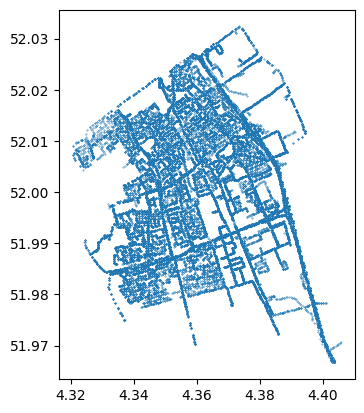

In [8]:
panoids.plot(markersize = 0.1)

<Axes: >

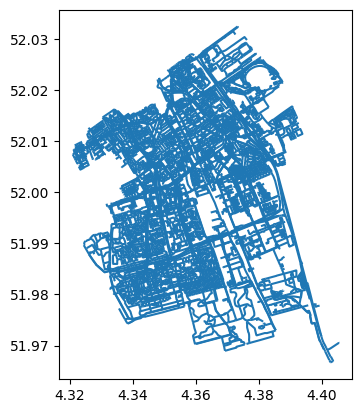

In [9]:
network.plot()

<Axes: >

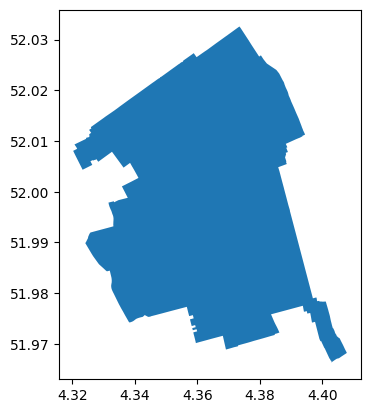

In [3]:
boundary.plot()

In [5]:


map_1 = KeplerGl(height=600)
map_1.add_data(data=panoids, name='panoids')
map_1.add_data(data=network, name='network')
map_1.add_data(data=cells, name='cells')
# map_1.add_data(data=g6, name='Uber Hex 6')
map_1.add_data(data=uberhex_7, name='Uber Hex 7')
map_1.add_data(data=uberhex_8, name='Uber Hex 8')
map_1.add_data(data=uberhex_9, name='Uber Hex 9')
# map_1.add_data(data=g10, name='Uber Hex 10')
map_1.add_data(data=network_nodes, name='network nodes')
map_1.add_data(data=boundary, name='boundaries')
map_1.add_data(data=wijken, name='wjiken')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'panoids': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

In [8]:
map_1.config

{'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'zlncejg',
     'type': 'point',
     'config': {'dataId': 'panoids',
      'label': 'Point',
      'color': [246, 209, 138],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lng', 'altitude': None},
      'isVisible': False,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusR

In [4]:
#Showcasing images in panoids
panoid = 'g0XWcAAF7lm0rt_5_7jJWw'
img_path = lambda x: data_path / 'imagedb' / f'{x}'

paths = panoids[panoids['panoid'] == panoid][['im_side_a',	'im_front',	'im_side_b',	'im_back']]

paths = paths.values.tolist()[0]
paths = [img_path(x) for x in paths]

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for i, path in enumerate(paths):
    img = Image.open(path)
    print(type(img))
    print(axs[i])
    axs[i].imshow(img)
    axs[i].axis('off')


<class 'PIL.JpegImagePlugin.JpegImageFile'>
Axes(0.125,0.11;0.168478x0.77)


: 

In [12]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x600 at 0x1CD18E03A50>
